In [19]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import researchpy as rp

kuuluvus = pd.read_excel("kuuluvus_ja_sugu.xlsx")
kuuluvus = kuuluvus[kuuluvus["Column9"] != "{question_not_shown}"]
kuuluvus = kuuluvus.drop(0)
kuuluvus = kuuluvus.drop(1)
kuuluvus = kuuluvus.drop(455)
kuuluvus = kuuluvus[kuuluvus["Column40"] == "Y"] # Y - yes (luba kasutada andmeid)

kuuluvus = kuuluvus.replace("5", 5)
kuuluvus = kuuluvus.replace("4", 4)
kuuluvus = kuuluvus.replace("3", 3)
kuuluvus = kuuluvus.replace("2", 2)
kuuluvus = kuuluvus.replace("1", 1)

kuuluvus['Column12reverse'] = kuuluvus.apply(lambda row: abs(row.Column12-6), axis=1)
kuuluvus['Column13reverse'] = kuuluvus.apply(lambda row: abs(row.Column13-6), axis=1)
kuuluvus['Column14reverse'] = kuuluvus.apply(lambda row: abs(row.Column14-6), axis=1)

kuuluvus['kuuluvusskoor'] = kuuluvus.apply(lambda row: row.Column9 + row.Column10 + row.Column11 + row.Column12reverse + row.Column13reverse + row.Column14reverse, axis=1)


print(kuuluvus)

     Column9  Column10  Column11  Column12  Column13  Column14 Column39  \
9          5         3         4         2         2         1       A1   
10         3         2         4         1         4         1       A1   
12         4         3         3         2         3         2       A1   
13         3         4         3         4         2         1       A1   
15         4         3         3         2         2         1       A1   
..       ...       ...       ...       ...       ...       ...      ...   
445        4         2         2         1         4         1       A1   
446        4         4         2         3         1         1       A1   
449        4         4         4         1         1         1       A1   
453        5         5         5         2         2         1       A1   
462        3         2         1         4         1         4       A1   

    Column40  Column12reverse  Column13reverse  Column14reverse  kuuluvusskoor  
9          Y      

In [21]:
naised = kuuluvus[kuuluvus["Column39"] != "A1"]
print(naised)

     Column9  Column10  Column11  Column12  Column13  Column14 Column39  \
20         4         4         4         2         2         2       A2   
26         4         4         4         2         2         2       A2   
27         5         5         5         2         2         1       A2   
30         4         2         3         3         2         1       A2   
31         5         4         4         2         1         1       A2   
..       ...       ...       ...       ...       ...       ...      ...   
392        4         4         5         2         1         1       A2   
396        3         1         2         3         5         3       A2   
399        4         4         2         4         4         2       A2   
423        4         3         4         2         2         2       A2   
432        4         4         4         3         2         1       A2   

    Column40  Column12reverse  Column13reverse  Column14reverse  kuuluvusskoor  
20         Y      

In [22]:
mehed = kuuluvus[kuuluvus["Column39"] == "A1"]
print(mehed)

     Column9  Column10  Column11  Column12  Column13  Column14 Column39  \
9          5         3         4         2         2         1       A1   
10         3         2         4         1         4         1       A1   
12         4         3         3         2         3         2       A1   
13         3         4         3         4         2         1       A1   
15         4         3         3         2         2         1       A1   
..       ...       ...       ...       ...       ...       ...      ...   
445        4         2         2         1         4         1       A1   
446        4         4         2         3         1         1       A1   
449        4         4         4         1         1         1       A1   
453        5         5         5         2         2         1       A1   
462        3         2         1         4         1         4       A1   

    Column40  Column12reverse  Column13reverse  Column14reverse  kuuluvusskoor  
9          Y      

In [23]:
# Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian, et teised peavad minust lugu.]
print(naised["Column9"].mean())
print(mehed["Column9"].mean())

3.746031746031746
3.7839506172839505


In [24]:
# Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian kergesti sõpru.]
print(naised["Column10"].mean())
print(mehed["Column10"].mean())

3.142857142857143
3.1419753086419755


In [25]:
# Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen, et olen osa sellest kursusest.]
print(naised["Column11"].mean())
print(mehed["Column11"].mean())

3.3968253968253967
3.314814814814815


In [26]:
# Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end koolis kohmaka ja kohatuna.]
print(naised["Column12reverse"].mean())
print(mehed["Column12reverse"].mean())

3.3492063492063493
3.7962962962962963


In [27]:
summary, results = rp.ttest(group1= naised["Column12reverse"], group1_name= "Naise kuuluvus",
                            group2= mehed["Column12reverse"], group2_name= "Meeste kuuluvus")
print(summary)
print(results)

          Variable      N      Mean        SD        SE  95% Conf.  Interval
0   Naise kuuluvus   63.0  3.349206  1.049712  0.132251   3.084840  3.613573
1  Meeste kuuluvus  162.0  3.796296  1.010128  0.079363   3.639569  3.953023
2         combined  225.0  3.671111  1.038677  0.069245   3.534656  3.807566
                                 Independent t-test   results
0  Difference (Naise kuuluvus - Meeste kuuluvus) =    -0.4471
1                             Degrees of freedom =   223.0000
2                                              t =    -2.9484
3                          Two side test p value =     0.0035
4                         Difference < 0 p value =     0.0018
5                         Difference > 0 p value =     0.9982
6                                      Cohen's d =    -0.4378
7                                      Hedge's g =    -0.4363
8                                 Glass's delta1 =    -0.4259
9                               Point-Biserial r =    -0.1937


In [28]:
# Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis üksikuna.]
print(naised["Column13reverse"].mean())
print(mehed["Column13reverse"].mean())

3.2222222222222223
3.6728395061728394


In [29]:
summary, results = rp.ttest(group1= naised["Column13reverse"], group1_name= "Naise kuuluvus",
                            group2= mehed["Column13reverse"], group2_name= "Meeste kuuluvus")
print(summary)
print(results)

          Variable      N      Mean        SD        SE  95% Conf.  Interval
0   Naise kuuluvus   63.0  3.222222  1.197369  0.150854   2.920669  3.523776
1  Meeste kuuluvus  162.0  3.672840  1.130219  0.088798   3.497480  3.848199
2         combined  225.0  3.546667  1.164505  0.077634   3.393681  3.699652
                                 Independent t-test   results
0  Difference (Naise kuuluvus - Meeste kuuluvus) =    -0.4506
1                             Degrees of freedom =   223.0000
2                                              t =    -2.6407
3                          Two side test p value =     0.0089
4                         Difference < 0 p value =     0.0044
5                         Difference > 0 p value =     0.9956
6                                      Cohen's d =    -0.3921
7                                      Hedge's g =    -0.3908
8                                 Glass's delta1 =    -0.3763
9                               Point-Biserial r =    -0.1741


In [30]:
# Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis tõrjutuna.]
print(naised["Column14reverse"].mean())
print(mehed["Column14reverse"].mean())

4.380952380952381
4.537037037037037


In [31]:
kuuluvus['kuuluvusskoor'] = kuuluvus.apply(lambda row: row.Column9 + row.Column10 + row.Column11 + row.Column12reverse + row.Column13reverse + row.Column14reverse, axis=1)

print(kuuluvus)

     Column9  Column10  Column11  Column12  Column13  Column14 Column39  \
9          5         3         4         2         2         1       A1   
10         3         2         4         1         4         1       A1   
12         4         3         3         2         3         2       A1   
13         3         4         3         4         2         1       A1   
15         4         3         3         2         2         1       A1   
..       ...       ...       ...       ...       ...       ...      ...   
445        4         2         2         1         4         1       A1   
446        4         4         2         3         1         1       A1   
449        4         4         4         1         1         1       A1   
453        5         5         5         2         2         1       A1   
462        3         2         1         4         1         4       A1   

    Column40  Column12reverse  Column13reverse  Column14reverse  kuuluvusskoor  
9          Y      

In [32]:
print("Naised:")
print(naised["kuuluvusskoor"].mean())
print("Mehed:")
print(mehed["kuuluvusskoor"].mean())

Naised:
21.238095238095237
Mehed:
22.246913580246915


In [33]:
summary, results = rp.ttest(group1= naised["kuuluvusskoor"], group1_name= "Naise kuuluvus",
                            group2= mehed["kuuluvusskoor"], group2_name= "Meeste kuuluvus")
print(summary)
print(results)

          Variable      N       Mean        SD        SE  95% Conf.   Interval
0   Naise kuuluvus   63.0  21.238095  4.376308  0.551363  20.135936  22.340254
1  Meeste kuuluvus  162.0  22.246914  4.084605  0.320917  21.613164  22.880663
2         combined  225.0  21.964444  4.183148  0.278877  21.414887  22.514002
                                 Independent t-test   results
0  Difference (Naise kuuluvus - Meeste kuuluvus) =    -1.0088
1                             Degrees of freedom =   223.0000
2                                              t =    -1.6302
3                          Two side test p value =     0.1045
4                         Difference < 0 p value =     0.0522
5                         Difference > 0 p value =     0.9478
6                                      Cohen's d =    -0.2421
7                                      Hedge's g =    -0.2412
8                                 Glass's delta1 =    -0.2305
9                               Point-Biserial r =    -0.1085


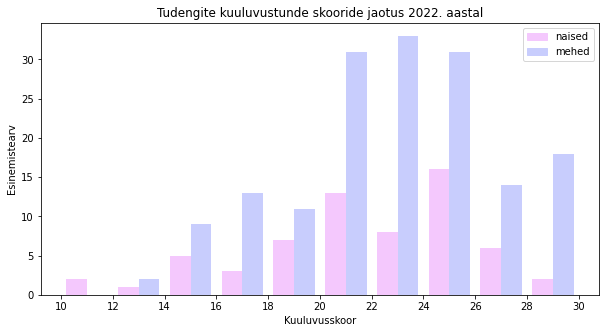

In [34]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

n, bins, patches = plt.hist([naised["kuuluvusskoor"], mehed["kuuluvusskoor"]], bins = 10, color=['#F4C8FD','#C8CDFD'])
plt.ylabel("Esinemistearv")
plt.xlabel("Kuuluvusskoor")
plt.xticks(bins)
plt.title("Tudengite kuuluvustunde skooride jaotus 2022. aastal")

# Graafiku legendi moodustamine https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
varvid = {'naised':'#F4C8FD', 'mehed':'#C8CDFD'}         
tingimused = list(varvid.keys())
kastid = [plt.Rectangle((0,0),1,1, color=varvid[tingimus]) for tingimus in tingimused]
plt.legend(kastid, tingimused)

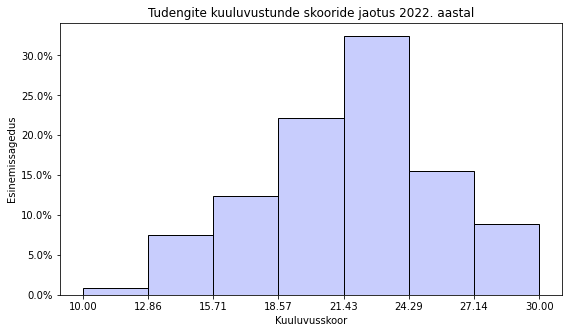

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

f = plt.figure()
f.set_figwidth(9)
f.set_figheight(5)

n, bins, patches = plt.hist(kuuluvus["kuuluvusskoor"], weights=np.ones(len(kuuluvus["kuuluvusskoor"])) / len(kuuluvus["kuuluvusskoor"]), bins = 7, color=['#C8CDFD'], edgecolor="black")
plt.ylabel("Esinemissagedus")
plt.xlabel("Kuuluvusskoor")
plt.title("Tudengite kuuluvustunde skooride jaotus 2022. aastal")
plt.xticks(bins)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
